# import dataset

In [1]:
import pandas as pd
import numpy as np
import csv

setwd = 'dataRH.xlsx'

dataRH = pd.read_excel(io=setwd)

# Testing independence between two (qualitative) variables

### output: X-square p-value df 

In [12]:
import numpy as np
from scipy.stats import chi2_contingency

testtable =np.array( [[dataRH["sex"].values],[dataRH["jobtitle"].values]])
chi2_contingency(testtable)


(274.4958213601533,
 1.0,
 499,
 array([[[0.49740933, 0.49740933, 0.49740933, 0.49740933, 0.49740933,
          0.74611399, 0.49740933, 0.49740933, 0.49740933, 0.49740933,
          0.49740933, 0.49740933, 0.99481865, 0.49740933, 0.49740933,
          0.49740933, 0.99481865, 0.49740933, 0.49740933, 0.74611399,
          0.49740933, 0.49740933, 0.24870466, 0.49740933, 0.49740933,
          0.49740933, 0.49740933, 0.49740933, 0.49740933, 0.49740933,
          0.74611399, 0.74611399, 0.24870466, 0.49740933, 0.49740933,
          0.49740933, 0.24870466, 0.49740933, 0.49740933, 0.49740933,
          0.99481865, 0.49740933, 0.24870466, 0.49740933, 0.49740933,
          0.24870466, 0.49740933, 0.49740933, 0.49740933, 0.49740933,
          0.49740933, 0.49740933, 0.99481865, 0.49740933, 0.99481865,
          0.24870466, 0.49740933, 0.49740933, 0.49740933, 0.49740933,
          0.99481865, 0.49740933, 0.49740933, 0.49740933, 0.49740933,
          0.49740933, 0.99481865, 0.74611399, 0.99481865, 

When the p-value is >0.05 than we accept the Null-hypothesis to conclude that there is independence between the two variable
When the p-value is <0.05 than we reject the Null-hypothesis to conclude that there is dependence between the two variable

# Testing the diﬀerence between two means (quantitative variables)


In [13]:
print(dataRH["wage"][dataRH["sex"]==0])

2      2620
4      3315
5      3375
6      3550
7      3680
       ... 
480    2640
482    2985
485    5560
488    3465
493    3370
Name: wage, Length: 212, dtype: int64


In [17]:
from scipy import stats
import numpy as np

testtable2 = np.array( [[dataRH["wage"][dataRH["sex"]==0].values],[dataRH["wage"][dataRH["sex"]==1].values]])
wage_sex0 = dataRH["wage"][dataRH["sex"]==0].values
wage_sex1 = dataRH["wage"][dataRH["sex"]==1].values


#方差齐性检验
leveneTest=stats.levene(wage_sex0,wage_sex1,center='median')
print('w-value=%6.4f, p-value=%6.4f' %leveneTest)
stats.stats.ttest_ind(wage_sex0,wage_sex1,equal_var=False)


w-value=0.0301, p-value=0.8623


Ttest_indResult(statistic=4.698415743250168, pvalue=3.4909394794817424e-06)

When the p-value is >0.05 than we accept the Null-hypothesis to conclude that there is no signiﬁcant diﬀerence between the two means 
When the p-value is <0.05 than we reject the Null-hypothesis to conclude that there is a signiﬁcant diﬀerence between the two means.

# Data visualization

In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False
#matplotlib.fontsize='15'
 
#plt.rcParams['figure.figsize'] = (12.0,5.0)  #设置图形大小
 
#图形内嵌式，notebook模式下（注释不可加在下列命令后）
%matplotlib inline
#ipython模式下
#%pylab inline


#Seaborn有两组函数对风格进行控制：axes_style()/set_style()函数和plotting_context()/set_context()函数。
#Seaborn有5种预定义的主题：darkgrid（默认）、whitegrid、dark、white、ticks
#Seaborn有4种预定义的上下文：paper、notebook（默认）、talk、poster
sns.set_style("whitegrid")

# sns.set_context("poster")
# sns.set_style(style=None, rc=None)
# sns.despine(offset=10)  #图与轴线距离
# sns.despine()  #去除刻度和轴线
# sns.set_context(fontscale=1.5)  #字体大小
# sns.set_context(rc={'lines.linewidth':1.5)  #线宽
# sns.set()   #恢复默认值

线图

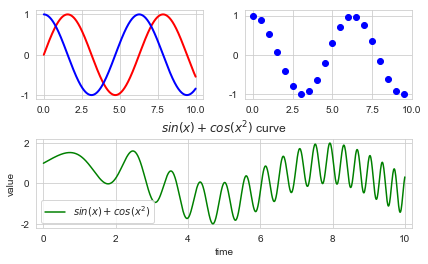

In [23]:
# data
x=np.linspace(0,10,1000)
y1=np.sin(x)
y2=np.cos(x)
y3=np.cos(x**2)
 
plt.figure(1) #图编号
plt.subplot(221)
plt.plot(x,y1,label="$sin(x)$",color="red",linewidth=2)
plt.plot(x,y2,label="$cos(x)$",color="blue",linewidth=2)
 
plt.subplot(222)
plt.scatter(x[:1000:50],y2[:1000:50],color="blue",label="$cos(x^2)$")
 
plt.subplot(212) #改变图分块
plt.plot(x,y1+y3,"g-",label="$sin(x)+cos(x^2)$")
plt.xlabel("time")
plt.ylabel("value")
plt.title("$sin(x)+cos(x^2)$ curve")
plt.xlim(-0.2,10.2)
plt.legend()#显示左下角的图例
 
plt.subplots_adjust(left=0.08,right=0.95,wspace=0.25,hspace=0.45)
#subplots_adjust类似于网页css格式化中的边距处理，取决于你需要绘制的大小和各模块之间的间距
plt.show()

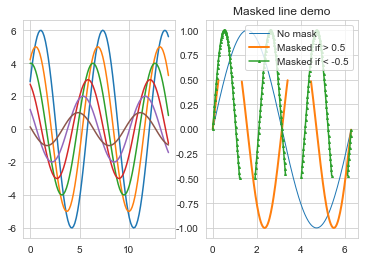

In [24]:
plt.figure(3)
plt.rcParams['figure.figsize'] = (12,4)
 
plt.subplot(121)
def sinplot(flip=1):
    x=np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x,np.sin(x+i*0.5)*(7-i)*flip)
sinplot()
 
plt.subplot(122)
x = np.arange(0, 2*np.pi, 0.02) 
y = np.sin(x) 
y1 = np.sin(2*x) 
y2 = np.sin(3*x) 
ym1 = np.ma.masked_where(y1 > 0.5, y1) 
ym2 = np.ma.masked_where(y2 < -0.5, y2) 
#绘图
lines = plt.plot(x, y, x, ym1, x, ym2, 'o') 
#设置线的属性
plt.setp(lines[0], linewidth=1) 
plt.setp(lines[1], linewidth=2) 
plt.setp(lines[2], linestyle='-',marker='^',markersize=2) 
#线的标签
plt.legend(('No mask', 'Masked if > 0.5', 'Masked if < -0.5'), loc='upper right') 
plt.title('Masked line demo') 
plt.show()

条形图+饼图+直方图+阶梯图

D:\Anaconda\envs\image_AI\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


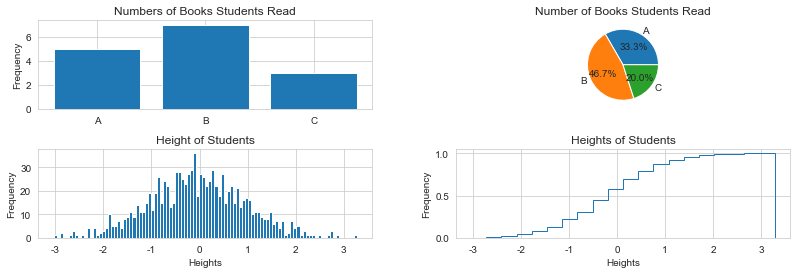

In [25]:
plt.figure(2)
#数据
np.random.seed(sum(map(ord,"aesthetics")))
d1 = dict([['A',5], ['B',7], ['C',3]])
d2 = np.random.randn(1000)
 
#条形图
plt.subplot(221)
plt.bar(d1.keys(),d1.values(),align='center') #,alpha=.7,color='g'
#plt.bar(range(3),d1.values(),align='center')
#plt.xticks(range(3),xticks)
plt.ylabel("Frequency")
plt.title("Numbers of Books Students Read")
 
#饼图
plt.subplot(222)
plt.pie(d1.values(),labels=d1.keys(),autopct='%1.1f%%')
plt.title("Number of Books Students Read")
 
#直方图
plt.subplot(223)
plt.hist(d2,100)
plt.xlabel('Heights')
plt.ylabel('Frequency')
plt.title('Height of Students')
 
#阶梯曲线/累积分布曲线
plt.subplot(224)
plt.hist(d2,20,normed=True,histtype='step',cumulative=True)
plt.xlabel('Heights')
plt.ylabel('Frequency')
plt.title('Heights of Students')
 
plt.subplots_adjust(left=0.08,right=0.95,wspace=0.25,hspace=0.45)  #图间距
plt.show()


饼图+箱线图

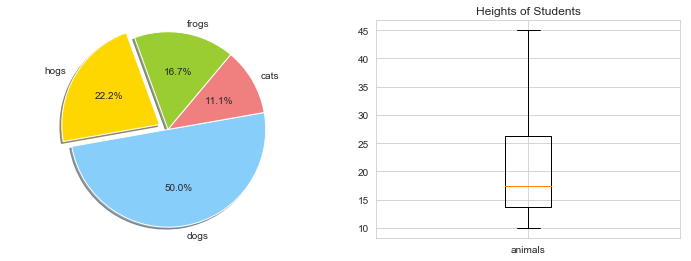

In [26]:
plt.figure(2)
plt.subplot(121)  #fig, ax
animals = dict([['frogs',15], ['hogs',20], ['dogs',45],['cats',10]])
colors = 'yellowgreen','gold','lightskyblue','lightcoral'
explode = 0,0.1,0,0
plt.pie(animals.values(), explode=explode, labels=animals.keys(),
        colors=colors, autopct='%1.1f%%', shadow=True, startangle=50)  #ax.pie
#ax.set(aspect="equal", title='Pie plot with animals')
plt.axis('equal')
 
plt.subplot(122)
plt.boxplot(animals.values(),labels=['animals'])
#plt.boxplot((x,y,z),labels=('x','y','z')) #水平vert=False，whis=1.5
#df.boxplot()
plt.title('Heights of Students')
plt.show()

雷达图 + 圆环图 

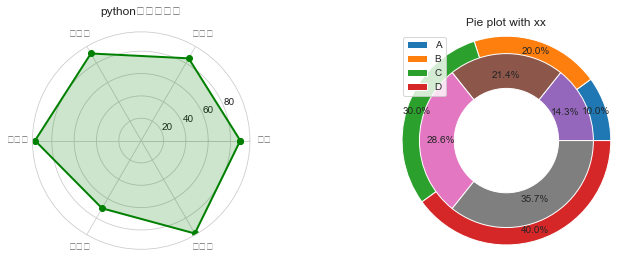

In [27]:
plt.figure(figsize=(12,4), facecolor="white")
#数据
labels=np.array(['综合', '第一周','第二周','第三周', '第四周', '第五周'])  #标签
nAttr = 6  #数据点个数
values = np.array([88.7, 85, 90, 95, 70, 96])  #原始数据
angles = np.linspace(0,2*np.pi, nAttr, endpoint=False)  #弧度
#首尾相连
values = np.concatenate((values,[values[0]]))
angles = np.concatenate((angles,[angles[0]]))
#绘图
plt.subplot(121, polar=True)  #极坐标系
plt.plot(angles, values, 'bo-', color='g', linewidth=2)  #线
plt.fill(angles, values, facecolor='g', alpha=0.2)  #区域
plt.thetagrids(angles*180/np.pi, labels)  #标签
#plt.figtext(0.52, 0.95, 'python成绩分析图', ha='center')  #标题
plt.title('python成绩分析图')
plt.grid(True)
#plt.savefig('dota_radar.JPG')
 
plt.subplot(122)
#fig, ax = plt.subplots()
vals1 = [1, 2, 3, 4]
vals2 = [2, 3, 4, 5]
vals3=[1]
labels = 'A', 'B', 'C', 'D'
plt.pie(vals1, radius=1.2, autopct='%1.1f%%', pctdistance=0.9)
plt.pie(vals2, radius=1, autopct='%1.1f%%', pctdistance=0.75)
plt.pie(vals3, radius=0.6, colors='w')
#ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.title('Pie plot with xx')
plt.legend(labels, loc='best') #bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.
plt.show()

直方图

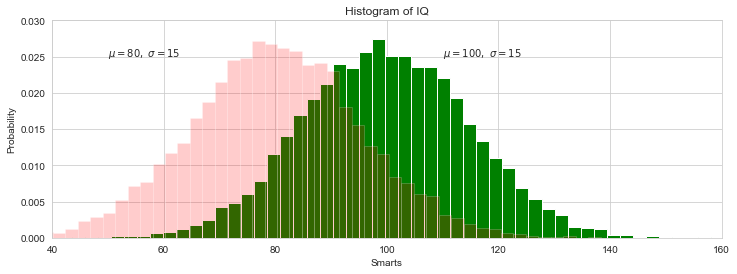

In [30]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(19680801)
mu1, sigma1 = 100, 15
mu2, sigma2 = 80, 15
x1 = mu1 + sigma1 * np.random.randn(10000)
x2 = mu2 + sigma2 * np.random.randn(10000)
# the histogram of the data
# 50：将数据分成50组
# facecolor：颜色；alpha：透明度
# density：是密度而不是具体数值
n1, bins1, patches1 = plt.hist(x1, 50, density=True, facecolor='g', alpha=1)
n2, bins2, patches2 = plt.hist(x2, 50, density=True, facecolor='r', alpha=0.2)
# n：概率值；bins：具体数值；patches：直方图对象。
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(110, .025, r'$\mu=100,\ \sigma=15$')
plt.text(50, .025, r'$\mu=80,\ \sigma=15$')
# 设置x，y轴的具体范围
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

柱状图

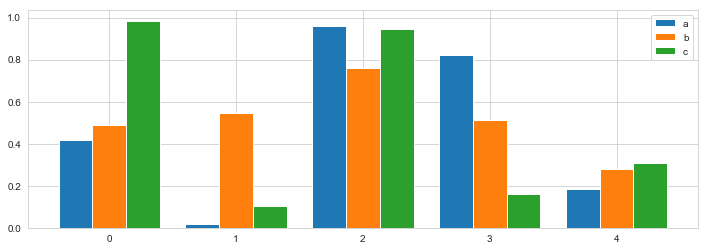

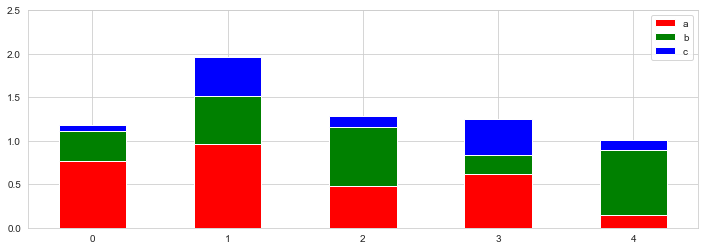

In [31]:
import numpy as np
import matplotlib.pyplot as plt
size = 5
a = np.random.random(size)
b = np.random.random(size)
c = np.random.random(size)
x = np.arange(size)
# 有多少个类型，只需更改n即可
total_width, n = 0.8, 3  
width = total_width / n
# 重新拟定x的坐标
x = x - (total_width - width) / 2
# 这里使用的是偏移
plt.bar(x, a, width=width, label='a')
plt.bar(x + width, b, width=width, label='b')
plt.bar(x + 2 * width, c, width=width, label='c')
plt.legend()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
size = 5
a = np.random.random(size)
b = np.random.random(size)
c = np.random.random(size)
x = np.arange(size)
# 这里使用的是偏移
plt.bar(x, a, width=0.5, label='a',fc='r')
plt.bar(x, b, bottom=a, width=0.5, label='b', fc='g')
plt.bar(x, c, bottom=a+b, width=0.5, label='c', fc='b')
plt.ylim(0, 2.5)
plt.legend()
plt.grid(True)
plt.show()

三维

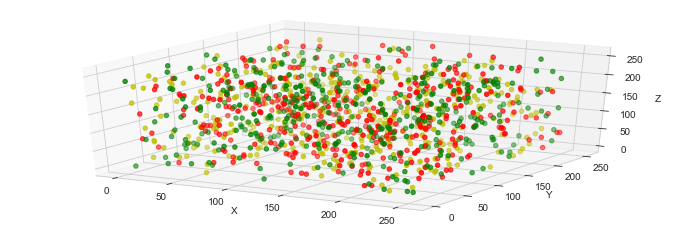

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
data = np.random.randint(0, 255, size=[40, 40, 40])
x, y, z = data[0], data[1], data[2]
ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程
# 将数据点分成三部分画，在颜色上有区分度
ax.scatter(x[:10], y[:10], z[:10], c='y') # 绘制数据点
ax.scatter(x[10:20], y[10:20], z[10:20], c='r')
ax.scatter(x[30:40], y[30:40], z[30:40], c='g')
ax.set_zlabel('Z') # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

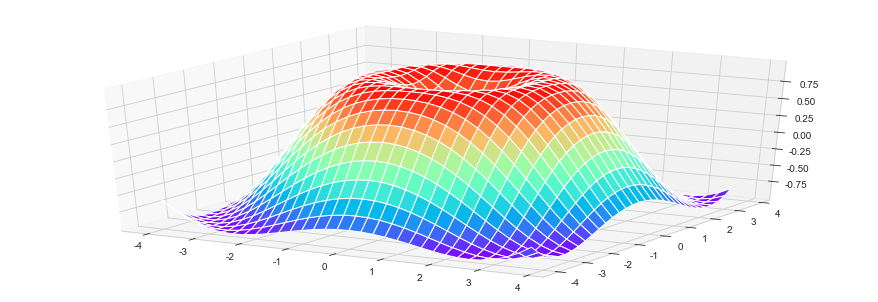

In [34]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()